# Recurrent Networks in Keras

This notebook shows you how to create a simple RNN (Recurrent Neural Network) in Keras.

 ## Loading the IMDB dataset
 First let's load our new dataset, the IMDB Movie reviews (https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification). This dataset contains reviews from 25,000 movies and each of them is labelled by sentiment (either positive or negative). The data is already preprocessed, each review is encoded as a sequence of word indexes. Because of feeding variable length sequences to a DNN is problematic, we need to pad them (https://keras.io/preprocessing/sequence/#pad_sequences).

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # length of the input text is padded to this many words (if the input is longer than this, it is truncated)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


The database encodes words as integers. The above code keeps only the top `max_features` most frequent words, the others are thrown away. Let's see how one text is encoded:

In [ ]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

It is useful to find a richer representation for a word, something more than a single integer. A very popular approach is to turn each word into a vector representation. With vector representations, one can allocate close values to words that have similar meanings and values far apart to words with different meanings. Assigning a vector for each word is called *word vector embedding* or embedding for short.

You can use a pretrained embedding such as [word2vec](https://en.wikipedia.org/wiki/Word2vec) or [GloVe](https://nlp.stanford.edu/projects/glove/). Similarly to using a pretrained CNN for image recognition, this has the advantage that the method was trained on a much larger dataset so it captures more information than our smallish IMDB dataset. For simplicity, we are going to use Keras' Embedding layer, that automatically learns a word vector embedding. Note however, for a real world project you might want to use word2vec or GloVe.

## SimpleRNN layer in Keras
![rnn layer](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)
The SimpleRNN layer (https://keras.io/layers/recurrent/#simplernn) is located in the ***keras.layers*** module. It can be used to process batches of sequences, so it takes inputs of shape *(batch_size, timesteps, input_features)*. Its main parameters are: 
```
keras.layers.SimpleRNN(units, 
                   activation='tanh', 
                   return_sequences=False)
```

**Main arguments**

*  **units:** Positive integer, dimensionality of the output space.
*  **activation:** Activation function to use (see [activations](https://keras.io/activations/)). Default: hyperbolic tangent (tanh). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x). 
*  **return_sequences:** Boolean. Whether to return the last output in the output sequence, or the full sequence.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 54s 345ms/step - loss: 0.5735 - acc: 0.6906 - val_loss: 0.4082 - val_acc: 0.8234
Epoch 2/10
157/157 [==============================] - 55s 348ms/step - loss: 0.3455 - acc: 0.8594 - val_loss: 0.8613 - val_acc: 0.6854
Epoch 3/10
157/157 [==============================] - 54s 343ms/step - loss: 0.2707 - acc: 0.8954 - val_loss: 0.3974 - val_acc: 0.8266
Epoch 4/10
157/157 [==============================] - 54s 344ms/step - loss: 0.2380 - acc: 0.9101 - val_loss: 0.3715 - val_acc: 0.8620
Epoch 5/10
157/157 [==============================] - 54s 343ms/step - loss: 0.1907 - acc: 0.9273 - val_loss: 0.4628 - val_acc: 0.7924
Epoch 6/10
157/157 [==============================] - 54s 346ms/step - loss: 0.1424 - acc: 0.9495 - val_loss: 0.4092 - val_acc: 0.8704
Epoch 7/10
157/157 [==============================] - 54s 343ms/step - loss: 0.1129 - acc: 0.9609 - val_loss: 0.4638 - val_acc: 0.8186
Epoch 8/10
157/157 [==============================] - 5

Let's display the training and validation loss and accuracy:

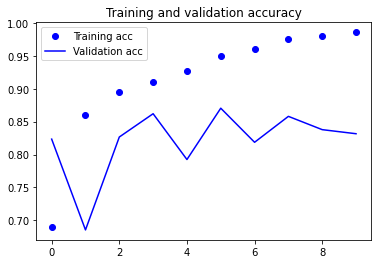

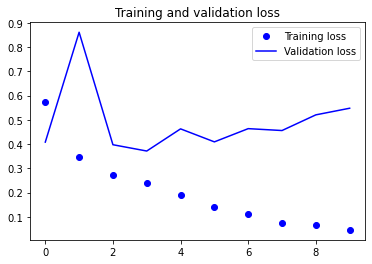

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

SimpleRNN isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. 

## LSTM layer in Keras
![lstm layer](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)
The LSTM layer (https://keras.io/layers/recurrent/#lstm) is also located in the ***keras.layers*** module. Its main parameters are: 
```
keras.layers.LSTM(units, 
                   activation='tanh', 
                   return_sequences=False)
```

**Main arguments**

*  **units:** Positive integer, dimensionality of the output space.
*  **activation:** Activation function to use (see [activations](https://keras.io/activations/)). Default: hyperbolic tangent (tanh). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x). 
*  **return_sequences:** Boolean. Whether to return the last output in the output sequence, or the full sequence.

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 148s 7ms/step - loss: 0.5004 - acc: 0.7680 - val_loss: 0.3699 - val_acc: 0.8480
Epoch 2/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.2922 - acc: 0.8857 - val_loss: 0.3144 - val_acc: 0.8678
Epoch 3/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.2346 - acc: 0.9114 - val_loss: 0.2890 - val_acc: 0.8880
Epoch 4/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.2004 - acc: 0.9241 - val_loss: 0.2927 - val_acc: 0.8762
Epoch 5/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.1755 - acc: 0.9357 - val_loss: 0.2935 - val_acc: 0.8750
Epoch 6/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.1633 - acc: 0.9419 - val_loss: 0.3951 - val_acc: 0.8736
Epo

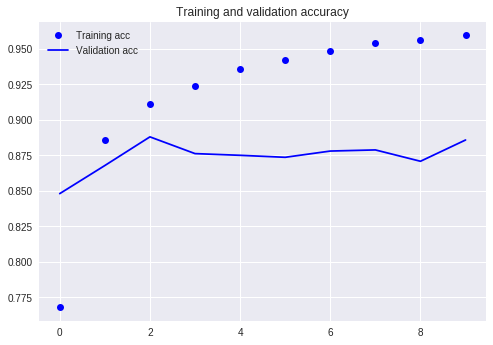

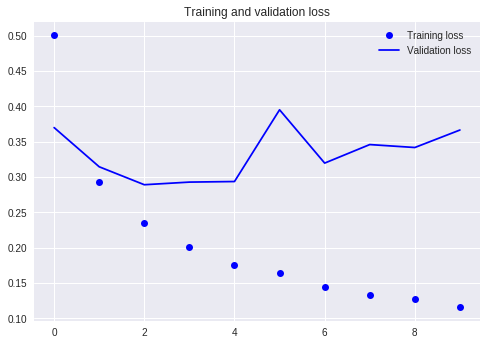

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We have achieved better results on the validation set. Let's how well does out LSTM work on the test set:

In [ ]:
model.evaluate(input_test, y_test, batch_size=128)

25000/25000 [==============================] - 33s 1ms/step


[0.42123891525268553, 0.8669200000190734]

We got an accuracy of 86.7%.

## References
* https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb
* https://keras.io/
* http://colah.github.io/posts/2015-08-Understanding-LSTMs/